Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [12]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

CHESS_WIDTH = 7
CHESS_HEIGHT = 5

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHESS_WIDTH*CHESS_HEIGHT,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESS_WIDTH, 0:CHESS_HEIGHT].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

new_resolution = (640, 480)

image_paths = glob.glob('samples/2F/*.jpg')

for image_path in image_paths:
    img = cv2.imread(image_path)

    
    # # Resize the frame to the new_resolution
    # img = cv2.resize(img, new_resolution)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    found_corners, corners = cv2.findChessboardCorners(gray, (CHESS_WIDTH, CHESS_HEIGHT), None)
    
    # If found, add object points, image points
    if found_corners == True:
        #Draw and display the corners
        cv2.drawChessboardCorners(img, (CHESS_WIDTH, CHESS_HEIGHT), corners, found_corners)
        
        
        objpoints.append(objp) # 3D point in real-world space
        imgpoints.append(corners)
        
        


cv2.destroyAllWindows()


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

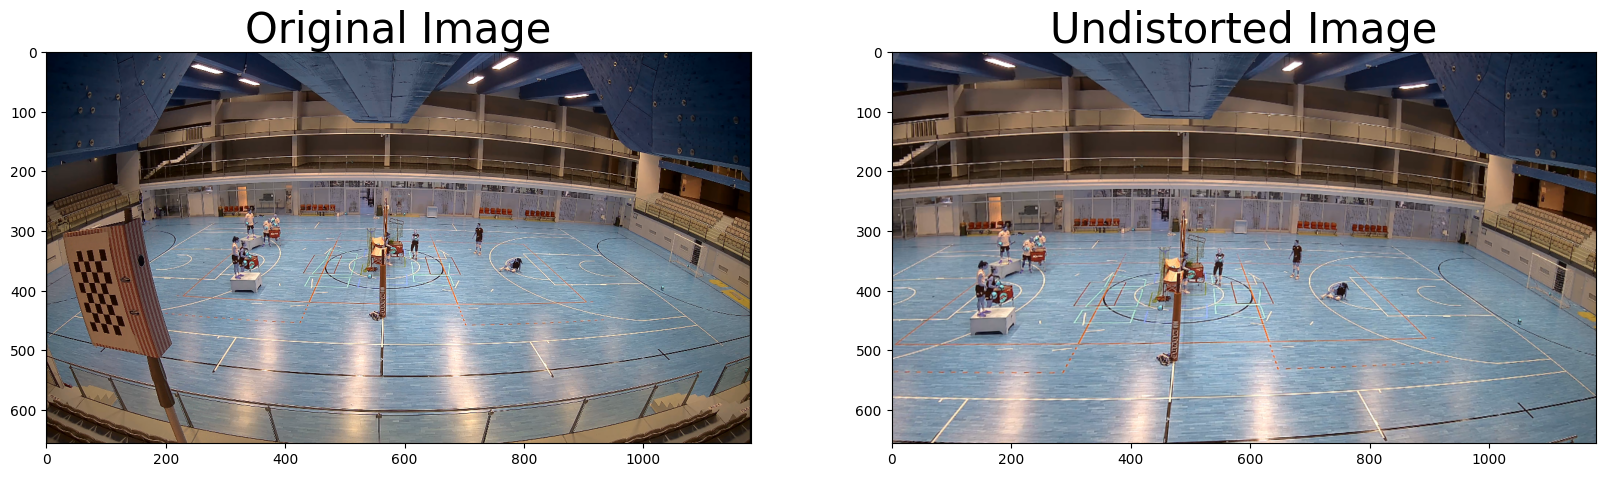

In [14]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

# Test undistortion on an image
img = cv2.imread('samples/prova.PNG')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

new_mtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,img_size,1,img_size)


undistorted_img = cv2.undistort(img, new_mtx, dist, None, mtx)
x, y, w, h = roi
undistorted_img = undistorted_img[y:y+h, x:x+w]
cv2.imwrite('samples/test_undist.jpg',undistorted_img)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "samples/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_img)
ax2.set_title('Undistorted Image', fontsize=30)